In [ ]:
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [206]:
df = pd.read_csv("Final_df.csv")

In [207]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'RK', 'TEAM', 'CONF', 'G', 'W', 'ADJOE',
       'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB',
       'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB', 'SEED',
       'POSTSEASON', 'Year'],
      dtype='object')

In [208]:
df = df.iloc[:,3:]

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        4238 non-null   object 
 1   CONF        4238 non-null   object 
 2   G           4238 non-null   int64  
 3   W           4238 non-null   int64  
 4   ADJOE       4238 non-null   float64
 5   ADJDE       4238 non-null   float64
 6   BARTHAG     4238 non-null   float64
 7   EFG_O       4238 non-null   float64
 8   EFG_D       4238 non-null   float64
 9   TOR         4238 non-null   float64
 10  TORD        4238 non-null   float64
 11  ORB         4238 non-null   float64
 12  DRB         4238 non-null   float64
 13  FTR         4238 non-null   float64
 14  FTRD        4238 non-null   float64
 15  2P_O        4238 non-null   float64
 16  2P_D        4238 non-null   float64
 17  3P_O        4238 non-null   float64
 18  3P_D        4238 non-null   float64
 19  ADJ_T       4238 non-null  

Being in one of the six power conferences had seemed to benefit from more talents as well as good competition throughout the year leading to better outcome in March

In [210]:
power_6 = ['B10', 'B12', 'SEC', 'ACC', 'P12', 'BE', 'ACC']
power_conf = []
for i in df['CONF']:
    if i in power_6:
        power_conf.append(1)
    else:
        power_conf.append(0)

df.insert(2, "Power Conference", power_conf)



Calculate the difference between  the Adjusted Offensive Efficiency and  Adjusted Defensive Efficiency 

In [212]:
adjusted_diff = df['ADJOE'] - df['ADJDE']
df.insert(5,'ADJEM', adjusted_diff)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TEAM              4238 non-null   object 
 1   CONF              4238 non-null   object 
 2   Power Conference  4238 non-null   int64  
 3   G                 4238 non-null   int64  
 4   W                 4238 non-null   int64  
 5   ADJEM             4238 non-null   float64
 6   ADJOE             4238 non-null   float64
 7   ADJDE             4238 non-null   float64
 8   BARTHAG           4238 non-null   float64
 9   EFG_O             4238 non-null   float64
 10  EFG_D             4238 non-null   float64
 11  TOR               4238 non-null   float64
 12  TORD              4238 non-null   float64
 13  ORB               4238 non-null   float64
 14  DRB               4238 non-null   float64
 15  FTR               4238 non-null   float64
 16  FTRD              4238 non-null   float64


In [214]:
adjusted_diff = df['TORD'] - df['TOR']
df.insert(11,'TOM', adjusted_diff)

In [216]:
adjusted_diff = df['ORB'] - df['DRB']
df.insert(13,'RBM', adjusted_diff)

In [218]:
df.to_csv("Adjusted_Final_df.csv")

In [219]:
df.dropna(subset=['POSTSEASON'], inplace=True)
df.drop(columns=['G', 'W'], inplace=True)
df.head(10)

,TEAM,CONF,Power Conference,ADJEM,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOM,TOR,RBM,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,POSTSEASON,Year
0,Houston,B12,1,33.7,119.2,85.5,0.9785,49.7,44.0,11.0,13.7,6.7,24.7,36.9,30.2,29.9,39.0,48.4,43.4,34.7,30.0,63.3,10.6,1.0,S16,2024
1,Connecticut,BE,1,33.5,127.1,93.6,0.9712,57.1,45.1,1.3,14.9,9.7,16.2,36.5,26.8,33.3,32.5,58.5,43.7,36.7,31.9,64.6,11.3,1.0,Champions,2024
2,Purdue,B10,1,31.5,126.2,94.7,0.9644,56.0,47.7,-2.5,16.5,12.7,14.0,37.4,24.7,42.8,23.0,53.2,48.1,40.8,31.4,67.6,11.0,1.0,2ND,2024
3,Iowa St.,B12,1,27.1,113.6,86.5,0.9583,51.9,47.1,10.0,15.7,2.2,25.7,31.6,29.4,36.1,35.2,51.7,46.9,34.9,31.5,67.6,6.9,2.0,S16,2024
4,Auburn,SEC,1,28.6,120.7,92.1,0.9573,54.1,43.4,3.3,14.9,2.6,18.2,32.9,30.3,38.2,41.0,54.9,42.8,35.2,29.8,69.8,5.5,4.0,R64,2024
5,Arizona,P12,1,27.9,121.5,93.6,0.9526,55.0,48.7,2.0,16.1,13.2,18.1,36.3,23.1,36.7,25.7,54.6,47.8,37.1,33.4,72.0,4.9,2.0,S16,2024
6,Tennessee,SEC,1,24.4,115.6,91.2,0.9382,51.5,45.4,4.3,14.6,3.8,18.9,32.4,28.6,34.3,35.8,51.6,44.3,34.2,31.4,69.2,5.8,2.0,E8,2024
7,Marquette,BE,1,24.3,118.9,94.6,0.9328,55.1,49.7,6.8,14.3,-4.8,21.1,26.0,30.8,25.6,28.2,56.0,49.2,35.8,33.6,69.1,6.5,2.0,S16,2024
8,North Carolina,ACC,1,23.6,116.8,93.2,0.9305,51.3,46.4,0.5,14.4,9.3,14.9,32.8,23.5,36.8,28.3,50.3,46.0,35.4,31.4,70.4,6.6,1.0,S16,2024
9,Creighton,BE,1,24.1,120.6,96.5,0.9289,57.5,46.4,-4.1,15.3,1.3,11.2,25.9,24.6,24.5,16.2,60.6,45.7,36.1,32.2,66.9,4.4,3.0,S16,2024


In [220]:
round_mapping = {
    'R68': 0,
    'R64': 1,
    'R32': 2,
    'S16': 3,
    'E8': 4,
    'F4': 5,
    '2ND':6,
    'Champions':7
}
df['POSTSEASON'] = df['POSTSEASON'].map(round_mapping)

In [ ]:
columns = [
    "ADJEM", "ADJOE", "ADJDE", "EFG_O", "EFG_D", "TOM", "TOR",
    "RBM", "TORD", "ORB", "DRB", "FTR", "FTRD", "2P_O", "2P_D", "3P_O",
    "3P_D", "ADJ_T", "WAB","Year", "BARTHAG"
]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_df = pd.DataFrame()

for year, group in df.groupby("Year"):
    scaled_data = scaler.fit_transform(group[columns])
    scaled_group = pd.DataFrame(scaled_data, columns=columns, index=group.index)
    scaled_group["Year"] = year
    scaled_df = pd.concat([scaled_df, scaled_group])

df[columns] = scaled_df[columns]



In [222]:
df.to_csv('scaled_adjusted_final_df.csv')

In [223]:
# Sort and slice the correlation values
corr_matrix = df.iloc[:, 2:-1].corr()
sorted_corr = corr_matrix['POSTSEASON'].sort_values(ascending=False).iloc[1:] 
sorted_corr

ADJEM               0.593405
WAB                 0.546724
ADJOE               0.524517
BARTHAG             0.490303
Power Conference    0.363118
EFG_O               0.239646
2P_O                0.228976
ORB                 0.194137
RBM                 0.182761
TOM                 0.142723
3P_O                0.141674
TORD                0.025193
DRB                -0.039541
ADJ_T              -0.039939
FTR                -0.099949
3P_D               -0.125987
FTRD               -0.160717
TOR                -0.194936
2P_D               -0.224428
EFG_D              -0.236022
ADJDE              -0.432565
SEED               -0.573911
Name: POSTSEASON, dtype: float64

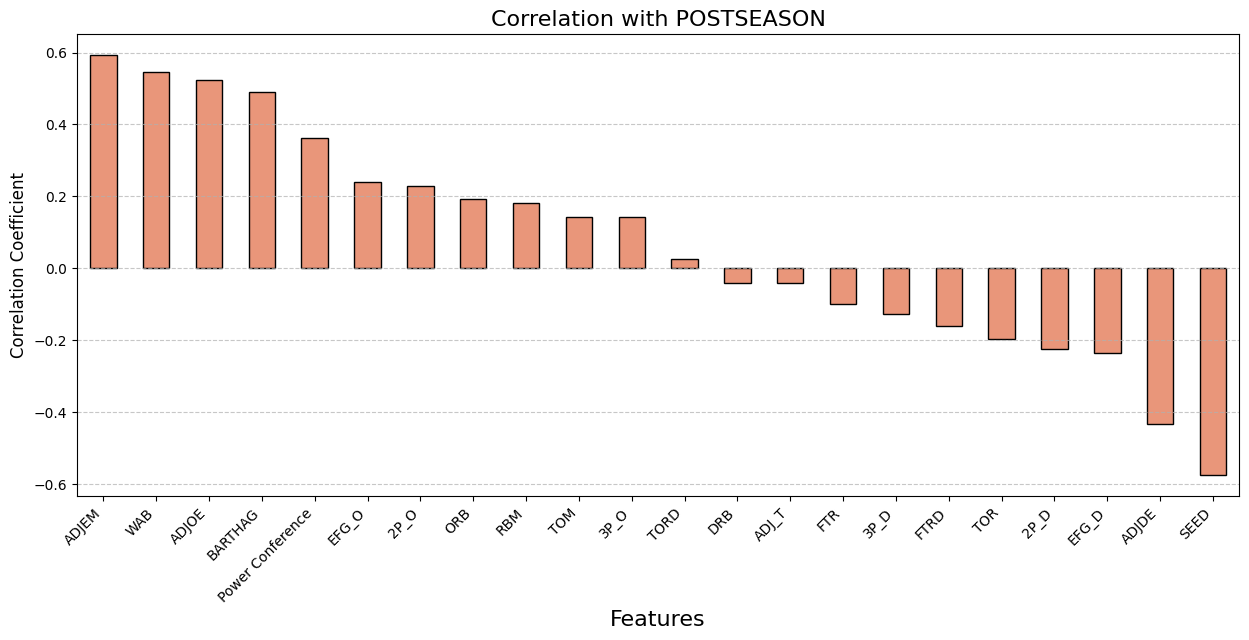

In [224]:
plt.figure(figsize=(15, 6))
sorted_corr.plot(kind='bar', color='darksalmon', edgecolor='black')  # Use 'bar' for vertical bars
plt.title('Correlation with POSTSEASON', fontsize=16)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xlabel('Features', fontsize=16)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
